In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel

In [66]:
# read movies and ratings data 
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# select the first 200 users
ratings = ratings.iloc[:29268,:]

# merge users with movies 
data = pd.merge(ratings, movies, on='movieId')
data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
29263,200,27685,2.0,1229878742,Bring It On Again (2004),Comedy
29264,200,34321,3.0,1229877839,Bad News Bears (2005),Children|Comedy
29265,200,45106,3.0,1229877358,American Dreamz (2006),Comedy|Drama
29266,200,50802,3.0,1229878025,Because I Said So (2007),Comedy|Drama|Romance


In [67]:
# movies description
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [68]:
# ratings description
ratings.describe()

,userId,movieId,rating,timestamp
count,29268.000000,29268.000000,29268.000000,2.926800e+04
mean,97.386326,18884.350690,3.578755,1.185299e+09
std,57.653913,36431.167261,1.045706,2.258085e+08
min,1.000000,1.000000,0.500000,8.293223e+08
25%,50.000000,1013.000000,3.000000,9.771438e+08
50%,91.000000,2707.000000,4.000000,1.158534e+09
75%,143.000000,7004.000000,4.000000,1.435838e+09
max,200.000000,193587.000000,5.000000,1.537110e+09


In [69]:
# get sum of ratings
df1 = data.groupby(['title'])[['rating']].sum()
df1.head(10)

,rating
title,
'Til There Was You (1997),3.0
'Tis the Season for Love (2015),1.5
"'burbs, The (1989)",16.0
(500) Days of Summer (2009),64.5
00 Schneider - Jagd auf Nihil Baxter (1994),4.5
1-900 (06) (1994),4.0
10 (1979),3.5
10 Cent Pistol (2015),0.5
10 Cloverfield Lane (2016),17.5


In [70]:
# mean rating of all movies
df2 = data.groupby('title')['rating'].mean().sort_values(ascending=False)
df2.head()

title
Son of the Bride (Hijo de la novia, El) (2001)                        5.0
Sherlock Holmes and Dr. Watson: Acquaintance (1979)                   5.0
Bill Hicks: Revelations (1993)                                        5.0
On the Other Side of the Tracks (De l'autre côté du périph) (2012)    5.0
On the Trail of the Bremen Town Musicians (1973)                      5.0
Name: rating, dtype: float64

In [ ]:
# count rating of all movies
df2.groupby('title')['rating'].count().sort_values(ascending=False)

In [71]:
# creating dataframe with 'rating' mean values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
 
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
 
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),3.000000,1
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.200000,5
(500) Days of Summer (2009),3.583333,18
00 Schneider - Jagd auf Nihil Baxter (1994),4.500000,1


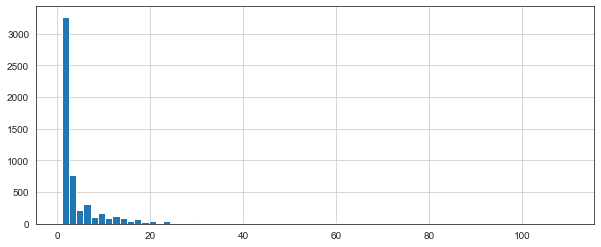

In [72]:
# plot 'num of ratings column' graph
plt.figure(figsize =(10, 4))
 
ratings['num of ratings'].hist(bins = 70)

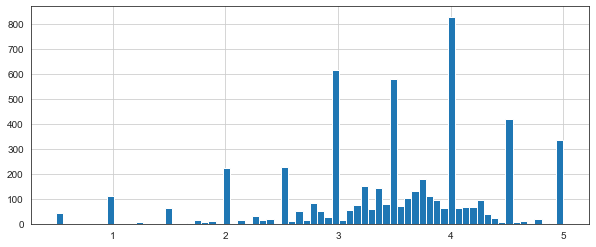

In [73]:
# plot of 'ratings' column graph
plt.figure(figsize =(10, 4))
 
ratings['rating'].hist(bins = 70)

In [74]:
CV = TfidfVectorizer()

# Construct the required TF-IDF matrix by fitting and transforming the data

tfidf_matrix = CV.fit_transform(movies['genres'])


In [75]:
# check shape of similarity matrix
tfidf_matrix.shape

(9742, 24)

In [76]:
# sort values according to the 'num of rating column'
sim_mat = data.pivot_table(index='userId',columns='title',values='rating')
sim_mat.head()

title,'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",(500) Days of Summer (2009),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),...,Zombie Strippers! (2008),Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zootopia (2016),Zulu (1964),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# calculate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [78]:
# build a reverse map of indices and movie titles
indices = pd.Series(movies.index, index = movies['title']).drop_duplicates()
indices

title
Toy Story (1995)                                0
Jumanji (1995)                                  1
Grumpier Old Men (1995)                         2
Waiting to Exhale (1995)                        3
Father of the Bride Part II (1995)              4
                                             ... 
Black Butler: Book of the Atlantic (2017)    9737
No Game No Life: Zero (2017)                 9738
Flint (2017)                                 9739
Bungo Stray Dogs: Dead Apple (2018)          9740
Andrew Dice Clay: Dice Rules (1991)          9741
Length: 9742, dtype: int64

In [79]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim = cosine_sim):
    # get the index of the movie that matches the title
    
    idx = indices[title]

    # get the pairwsie similarity scores of all movies with that movie
    
    sim_scores = list(enumerate(cosine_sim[idx]))

    # sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # get the scores of the 10 most similar movies
    
    sim_scores = sim_scores[1:11]

    # get the movie indices
    
    movie_indices = [i[0] for i in sim_scores]

    # return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [80]:
# call fn to get top 10 Similar movies to Toy Story (1995)
get_recommendations('Toy Story (1995)')

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
Name: title, dtype: object

In [81]:
# call fn to get top 10 Similar movies to Waiting to Exhale (1995)
get_recommendations('Waiting to Exhale (1995)')

10                  American President, The (1995)
47                         Mighty Aphrodite (1995)
52               Postman, The (Postino, Il) (1994)
83                          Beautiful Girls (1996)
165                 Something to Talk About (1995)
191                        Don Juan DeMarco (1995)
198    Eat Drink Man Woman (Yin shi nan nu) (1994)
243                           Nobody's Fool (1994)
309                        Corrina, Corrina (1994)
317                     I Like It Like That (1994)
Name: title, dtype: object